In [1]:
import numpy as np
#import pandas as pd
import rawpy
#import h5py
#import dask
#import dask.dataframe as dd

#import scipy as sp

import os
from tqdm import tqdm

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path_raw = './raw_noise/'

rgb_r = np.memmap('rgb_500_r.memmap', dtype='uint8', mode='w+', shape=(500,4498,6742))
rgb_g = np.memmap('rgb_500_g.memmap', dtype='uint8', mode='w+', shape=(500,4498,6742))
rgb_b = np.memmap('rgb_500_b.memmap', dtype='uint8', mode='w+', shape=(500,4498,6742))

files = os.listdir(path_raw)

i=0
for filename in (pbar := tqdm(files)):
    pbar.set_description(f"Processing {filename}")
    filename = os.path.join(path_raw, filename)
    raw = rawpy.imread(filename)
    rgb_read = raw.postprocess(use_camera_wb=True, output_color=rawpy.ColorSpace.sRGB)
    rgb_r[i] = rgb_read[:,:,0]
    rgb_g[i] = rgb_read[:,:,1]
    rgb_b[i] = rgb_read[:,:,2]
    i+=1
rgb_r = np.reshape(rgb_r,(500*4498*6742,1))
rgb_g = np.reshape(rgb_g,(500*4498*6742,1))
rgb_b = np.reshape(rgb_b,(500*4498*6742,1))
rgb_r.flush()
rgb_g.flush()
rgb_b.flush()

Processing iso_640__0100.CR3: 100%|██████████████████████████████████████████████████| 500/500 [33:24<00:00,  4.01s/it]


In [2]:
rgb_r = np.memmap('rgb_500_r.memmap', dtype='uint8', mode='r', shape=(500*4498*6742))
rgb_g = np.memmap('rgb_500_g.memmap', dtype='uint8', mode='r', shape=(500*4498*6742))
rgb_b = np.memmap('rgb_500_b.memmap', dtype='uint8', mode='r', shape=(500*4498*6742))

In [3]:
rgb_r.shape, rgb_g.shape, rgb_b.shape

((15162758000,), (15162758000,), (15162758000,))

Text(0.5, 1.0, 'red')

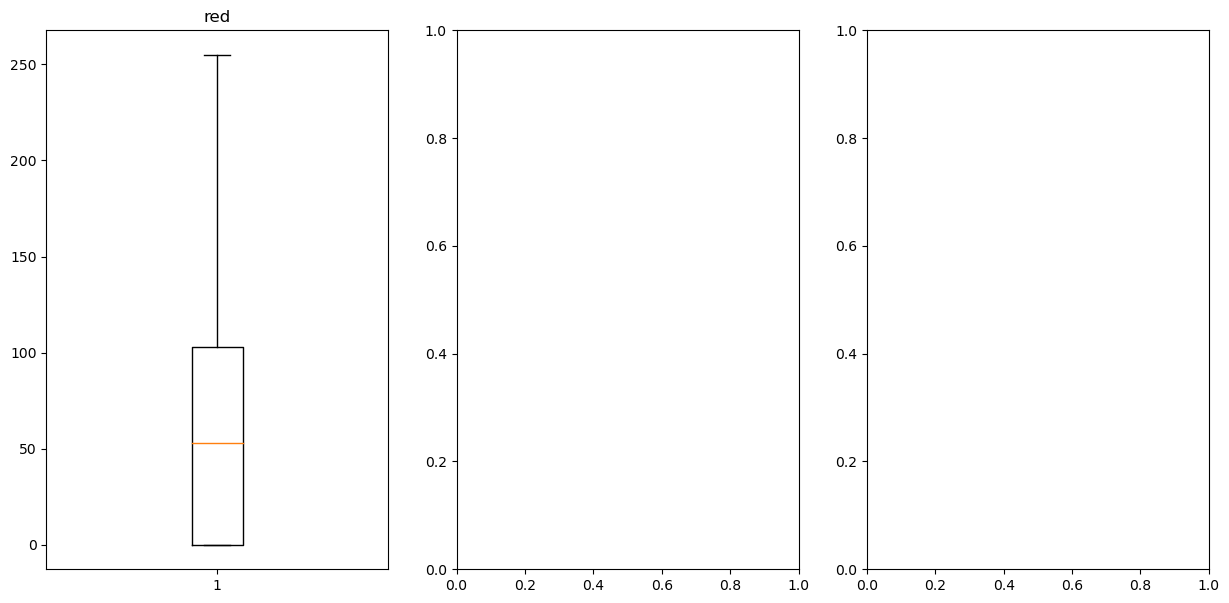

In [2]:
plt.subplots(1,3, figsize=(15,7))

plt.subplot(1,3,1)
rgb_r = np.memmap('rgb_500_r.memmap', dtype='uint8', mode='r', shape=(500*4498*6742))
plt.boxplot(rgb_r)
del rgb_r
plt.title('red')

Text(0.5, 1.0, 'green')

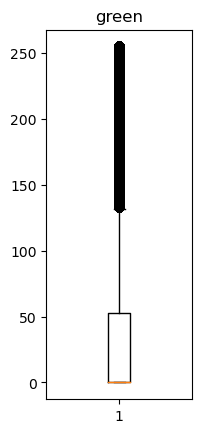

In [3]:
plt.subplot(1,3,2)
rgb_g = np.memmap('rgb_500_g.memmap', dtype='uint8', mode='r', shape=(500*4498*6742))
plt.boxplot(rgb_g)
del rgb_g
plt.title('green')

MemoryError: Unable to allocate 14.1 GiB for an array with shape (15162758000,) and data type uint8

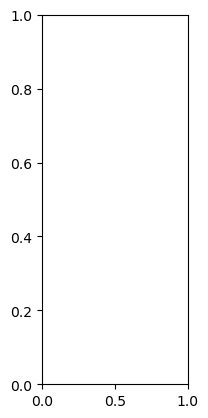

In [4]:
plt.subplot(1,3,3)
rgb_b = np.memmap('rgb_500_b.memmap', dtype='uint8', mode='r', shape=(500*4498*6742))
plt.boxplot(rgb_b)
del rgb_b
plt.title('blue')

In [6]:
plt.show()

memmap([0], dtype=uint8)

In [ ]:
plt.subplots(1,3, figsize=(15,7))
plt.subplot(1,3,1)
plt.hist(rgb_r, bins=51)
plt.title('red')
plt.subplot(1,3,2)
plt.hist(rgb_g, bins=51)
plt.title('green')
plt.subplot(1,3,3)
plt.hist(rgb_b, bins=51)
plt.title('blue')
plt.show()

# ----------------------------

In [ ]:
rgb = np.memmap('rgb.memmap', dtype='uint8', mode='r', shape=(37906895000, 3))

In [3]:
rgb_h5f = h5py.File('rgb.h5', 'w')
rgb_h5f.create_dataset('red', data=rgb[:,0])
rgb_h5f.create_dataset('green', data=rgb[:,1])
rgb_h5f.create_dataset('blue', data=rgb[:,2])
rgb_h5f.close()

In [37]:
vdf_rgb = vaex.open("rgb.h5")
vdf_rgb.info()

In [5]:
vdf_rgb.describe()

NameError: name 'vdf_rgb' is not defined

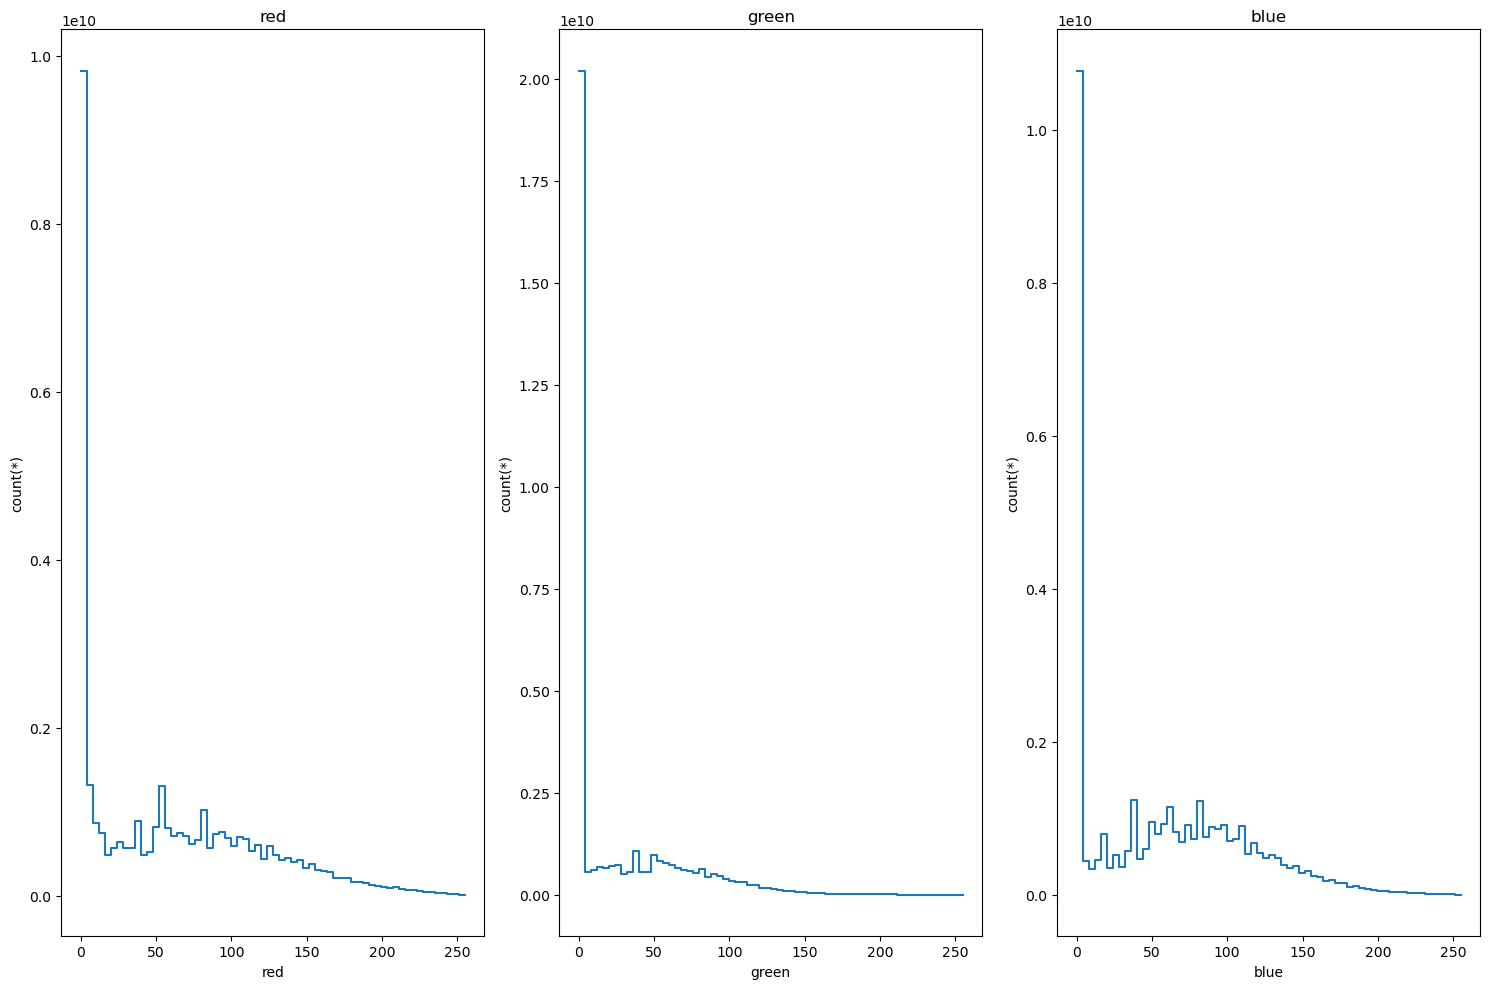

In [14]:
plt.subplots(1,3, figsize=(15,10))
plt.subplot(1,3,1)
vdf_rgb.viz.histogram(vdf_rgb['red'])
plt.title('red')
plt.subplot(1,3,2)
vdf_rgb.viz.histogram(vdf_rgb['green'])
plt.title('green')
plt.subplot(1,3,3)
vdf_rgb.viz.histogram(vdf_rgb['blue'])
plt.title('blue')
plt.show()

In [19]:
file = h5py.File('rgb.h5') # HDF5 file
ds_rgb_r = file['/red']          # Pointer on on-disk array
ds_rgb_r.shape                      # d can be very large

(37906895000,)

In [16]:
rgb_r_uniq = dask.array.unique(dds_rgb[:,0], return_counts=True)
rgb_g_uniq = dask.array.unique(dds_rgb[:,1], return_counts=True)
rgb_b_uniq = dask.array.unique(dds_rgb[:,2], return_counts=True)

In [18]:
dask.compute(rgb_r_uniq)
dask.compute(rgb_g_uniq)
dask.compute(rgb_b_uniq)

KeyboardInterrupt: 

In [71]:

length = rgb.shape[0]
start = np.random.randint(0,100)
rgb_subset_r = rgb[:,0][start:length:100]
rgb_subset_g = rgb[:,1][start:length:100]
rgb_subset_b = rgb[:,2][start:length:100]

for i in range(19):
    start = np.random.randint(0,100)
    np.concatenate(rgb_subset_r, rgb[:,0][start:length:100])
    np.concatenate(rgb_subset_g, rgb[:,1][start:length:100])
    np.concatenate(rgb_subset_b, rgb[:,2][start:length:100])
              
rgb_subset_r.shape, rgb_subset_g.shape, rgb_subset_b.shape              

TypeError: only integer scalar arrays can be converted to a scalar index

In [4]:
rgb_r

array([ 0, 45, 33, ..., 63, 86, 95], dtype=uint8)

In [4]:
np.save('rgb_500_r', rgb[:,0])
np.save('rgb_500_g', rgb[:,1])
np.save('rgb_500_b', rgb[:,2])

In [2]:
rgb_r = np.load('rgb_500_r.npy')
rgb_g = np.load('rgb_500_g.npy')
rgb_b = np.load('rgb_500_b.npy')

In [ ]:
rgb_r = np.memmap('rgb.memmap', dtype='uint8', mode='r', shape=(37906895000, 3))

MemoryError: Unable to allocate 14.1 GiB for an array with shape (15162758000,) and data type uint8

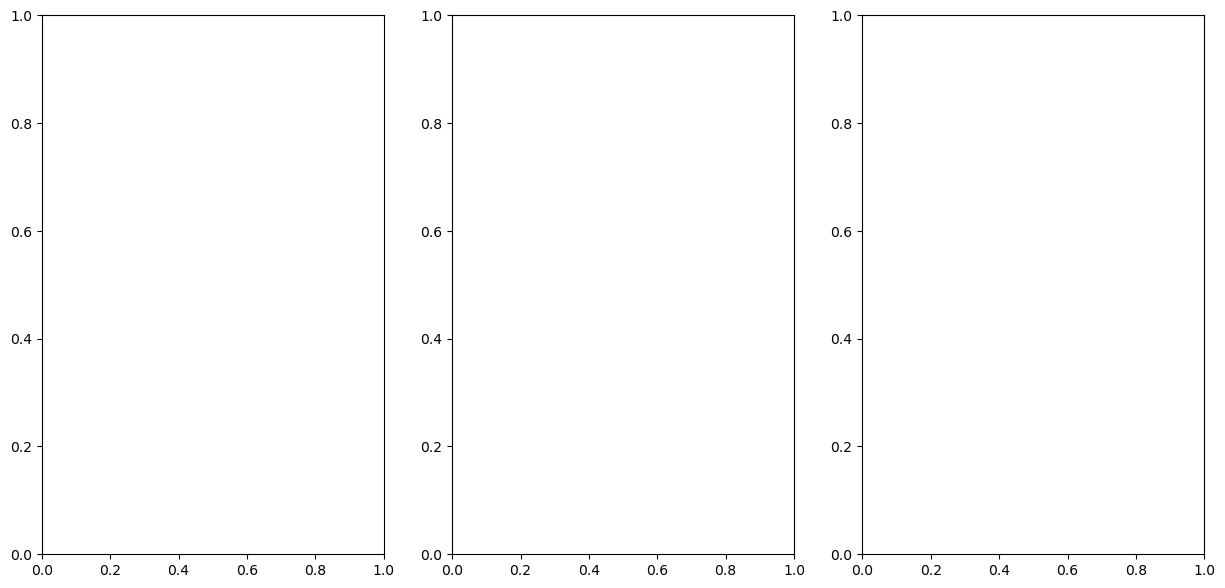

In [3]:
plt.subplots(1,3, figsize=(15,7))
plt.subplot(1,3,1)
plt.boxplot(rgb_r)
plt.title('red')
plt.subplot(1,3,2)
plt.boxplot(rgb_g)
plt.title('green')
plt.subplot(1,3,3)
plt.boxplot(rgb_b)
plt.title('blue')
plt.show()

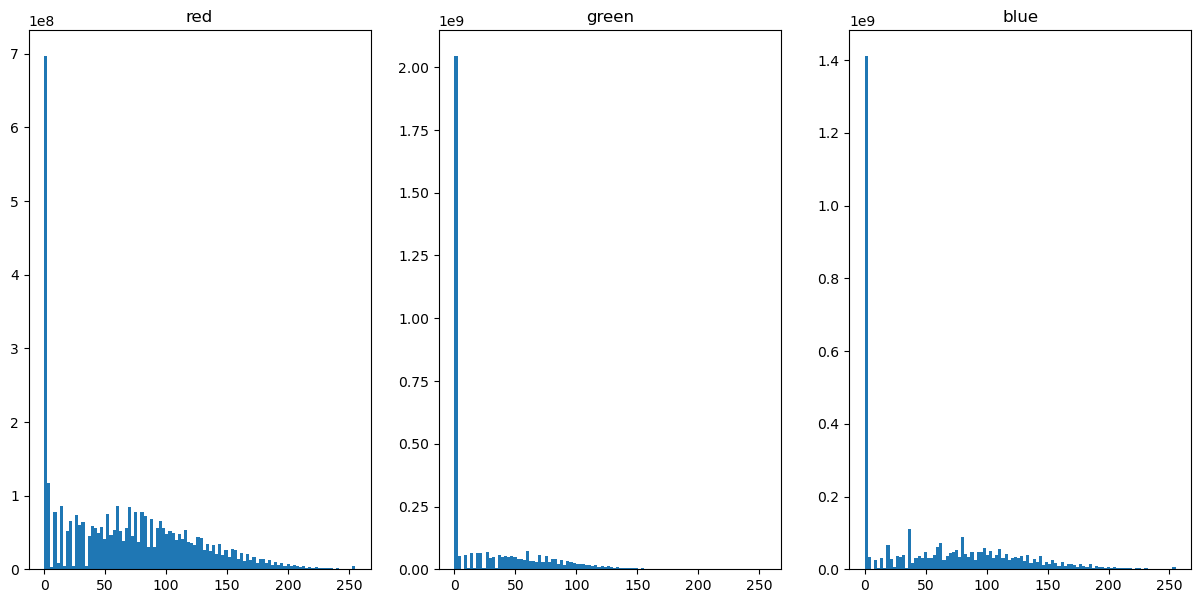

In [4]:
plt.subplots(1,3, figsize=(15,7))
plt.subplot(1,3,1)
plt.hist(rgb_subset_r, bins=100)
plt.title('red')
plt.subplot(1,3,2)
plt.hist(rgb_subset_g, bins=100)
plt.title('green')
plt.subplot(1,3,3)
plt.hist(rgb_subset_b, bins=100)
plt.title('blue')
plt.show()

# -------------------------

In [6]:
rgb_r[np.isnan(rgb_r)], rgb_g[np.isnan(rgb_g)], rgb_b[np.isnan(rgb_b)]

(array([], dtype=uint8), array([], dtype=uint8), array([], dtype=uint8))

In [8]:
rgb_quantiles = np.zeros((3,3))
rgb_quantiles[0] = np.quantile(rgb_r, [0.25, 0.5, 0.75])
rgb_quantiles[1] = np.quantile(rgb_g, [0.25, 0.5, 0.75])
rgb_quantiles[2] = np.quantile(rgb_b, [0.25, 0.5, 0.75])
rgb_quantiles

array([[  0.,  53., 103.],
       [  0.,   0.,  53.],
       [  0.,  57.,  97.]])

In [9]:
iqr = np.zeros((3,1))
iqr = rgb_quantiles[:,2] - rgb_quantiles[:,0]
iqr

array([103.,  53.,  97.])

In [10]:
wlo = np.zeros(3)
whi = np.zeros(3)
wlo = np.maximum(rgb_quantiles[:,0] - 1.5*iqr, 0)
whi = rgb_quantiles[:,2] + 1.5*iqr
wlo, whi

(array([0., 0., 0.]), array([257.5, 132.5, 242.5]))

In [13]:
rgb_r[rgb_r<whi[0]]

MemoryError: Unable to allocate 14.1 GiB for an array with shape (15162758000,) and data type uint8

In [11]:
rgb_r_wo_outl = rgb_r[(rgb_r > wlo[0]) & (rgb_r<whi[0])]
rgb_g_wo_outl = rgb_g[(rgb_g > wlo[1]) & (rgb_g<whi[1])]
rgb_b_wo_outl = rgb_b[(rgb_b > wlo[2]) & (rgb_b<whi[2])]

MemoryError: Unable to allocate 14.1 GiB for an array with shape (15162758000,) and data type bool

## Построение модели

In [58]:
rgb_r_uniq = np.unique(rgb_r, return_counts=True)
rgb_g_uniq = np.unique(rgb_g, return_counts=True)
rgb_b_uniq = np.unique(rgb_b, return_counts=True)
len_r = len(rgb_r)
len_g = len(rgb_g)
len_b = len(rgb_b)

In [59]:
vec_x_r = rgb_r_uniq[0]
vec_p_r = rgb_r_uniq[1].astype('float32')/len_r

vec_x_g = rgb_g_uniq[0]
vec_p_g = rgb_g_uniq[1].astype('float32')/len_g

vec_x_b = rgb_b_uniq[0]
vec_p_b = rgb_b_uniq[1].astype('float32')/len_b

In [60]:
sum(vec_p_r), sum(vec_p_g), sum(vec_p_b)

(1.0000000009689813, 0.9999999958585719, 0.9999999962039989)

In [65]:
rgb_r_uniq

(array([  2,   3,   4,   5,   6,   8,   9,  11,  12,  13,  14,  15,  16,
         17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
        173, 174, 175, 176, 177, 178, 179, 180, 181

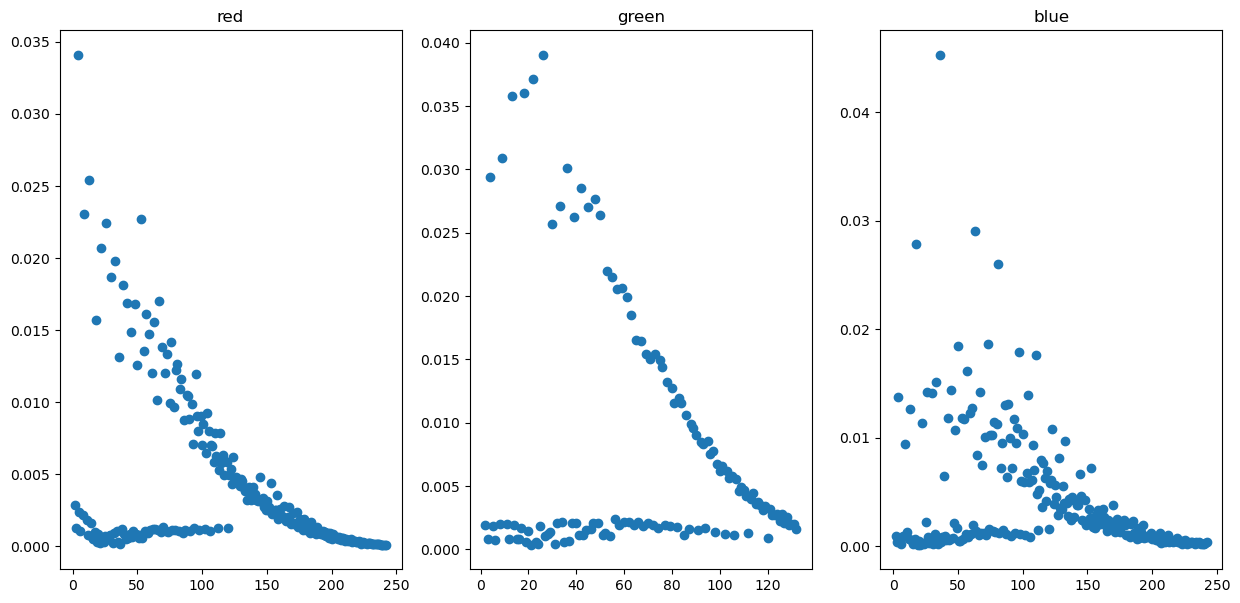

In [62]:
plt.subplots(1,3, figsize=(15,7))
plt.subplot(1,3,1)
plt.scatter(vec_x_r, vec_p_r)
plt.title('red')
plt.subplot(1,3,2)
plt.scatter(vec_x_g, vec_p_g)
plt.title('green')
plt.subplot(1,3,3)
plt.scatter(vec_x_b, vec_p_b)
plt.title('blue')
plt.show()

# ========================

In [23]:
dict_rgb = {'red': rgb_subset_r, 'green': rgb_subset_g, 'blue': rgb_subset_b}
df_rgb = pd.DataFrame(dict_rgb)
df_rgb

,red,green,blue
0,45,0,185
1,160,0,0
2,13,0,148
3,0,26,0
4,0,26,0
...,...,...,...
3790689495,0,59,4
3790689496,0,18,89
3790689497,0,9,75
3790689498,0,65,0


In [44]:
rgb_subset_b_wo_outl

array([185, 148, 110, ...,   4,  89,  75], dtype=uint8)

In [25]:
df_rgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790689500 entries, 0 to 3790689499
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   red     uint8
 1   green   uint8
 2   blue    uint8
dtypes: uint8(3)
memory usage: 10.6 GB


In [26]:
del df_rgb

# ***********************************************************

In [18]:
rgb_r = np.memmap('rgb_r.memmap', dtype='uint8', mode='w+', shape=(37906895000, 1))
rgb_g = np.memmap('rgb_g.memmap', dtype='uint8', mode='w+', shape=(37906895000, 1))
rgb_b = np.memmap('rgb_b.memmap', dtype='uint8', mode='w+', shape=(37906895000, 1))

In [43]:
rgb_r_uniq = np.unique(rgb_r, return_counts=True)
rgb_g_uniq = np.unique(rgb_g, return_counts=True)
rgb_b_uniq = np.unique(rgb_b, return_counts=True)

MemoryError: Unable to allocate 35.3 GiB for an array with shape (37906895000,) and data type bool

In [21]:
rgb_r.flush()
rgb_g.flush()
rgb_b.flush()

In [8]:
%%time
rgb_quantiles = np.zeros((3,3))
rgb_quantiles[0] = np.quantile(rgb[:,0], [0.25, 0.5, 0.75])
rgb_quantiles[1] = np.quantile(rgb[:,1], [0.25, 0.5, 0.75])
rgb_quantiles[2] = np.quantile(rgb[:,2], [0.25, 0.5, 0.75])

Wall time: 1h 42min 35s


In [23]:
rgb_quantiles

array([[  0.,  53., 104.],
       [  0.,   0.,  53.],
       [  0.,  57.,  99.]])

In [38]:
rgb_quantiles

In [5]:
rgb_quantiles = np.load('rgb_quantiles.npy')

In [24]:
iqr = rgb_quantiles[:,2] - rgb_quantiles[:,0]
iqr

array([104.,  53.,  99.])

In [36]:
%%time
outl_r = vdf[(rgb_r<whislo) | (rgb_r>whishi)]

MemoryError: Unable to allocate 35.3 GiB for an array with shape (37906895000,) and data type bool

In [ ]:
%%time
fig, axes = plt.subplots(1,3, figsize=(15, 7))
labels = ['red', 'green', 'blue']
stats = []
for i in range(len(labels)):
    whislo = np.maximum(rgb_quantiles[i][0] - 1.5*iqr, 0)
    whishi = rgb_quantiles[i][2] + 1.5*iqr
    stat = {}
    iqr = rgb_quantiles[i][2] - rgb_quantiles[i][0]
    stat['label'] = labels[i]
    #stat['mean'] = rgb_quantiles[i][1]
    stat['med'] = rgb_quantiles[i][1]
    stat['q1'] = rgb_quantiles[i][0]
    stat['q3'] = rgb_quantiles[i][2]
    stat['whislo'] = whislo
    stat['whishi'] = whishi
    if i==0:
        stat["fliers"] = rgb_r[(rgb_r<whislo) | (rgb_r>whishi)]
    if i==1:
        stat["fliers"] = rgb_b[(rgb_g<whislo) | (rgb_g>whishi)]
    if i==2:
        stat["fliers"] = rgb_g[(rgb_b<whislo) | (rgb_b>whishi)]
    axes[i].bxp([stat])

In [34]:
stat

{'label': 'red',
 'med': 53.0,
 'q1': 0.0,
 'q3': 104.0,
 'whislo': 0.0,
 'whishi': 260.0}

In [23]:
vec_counts_r = np.unique(rgb[:,0], return_counts=True)
vec_counts_g = np.unique(rgb[:,1], return_counts=True)
vec_counts_b = np.unique(rgb[:,2], return_counts=True)
length = len(rgb_r.flatten())

In [24]:
vec_x_r = vec_counts_r[0]
vec_p_r = vec_counts_r[1].astype('float32')/length

vec_x_g = vec_counts_g[0]
vec_p_g = vec_counts_g[1].astype('float32')/length

vec_x_b = vec_counts_b[0]
vec_p_b = vec_counts_b[1].astype('float32')/length

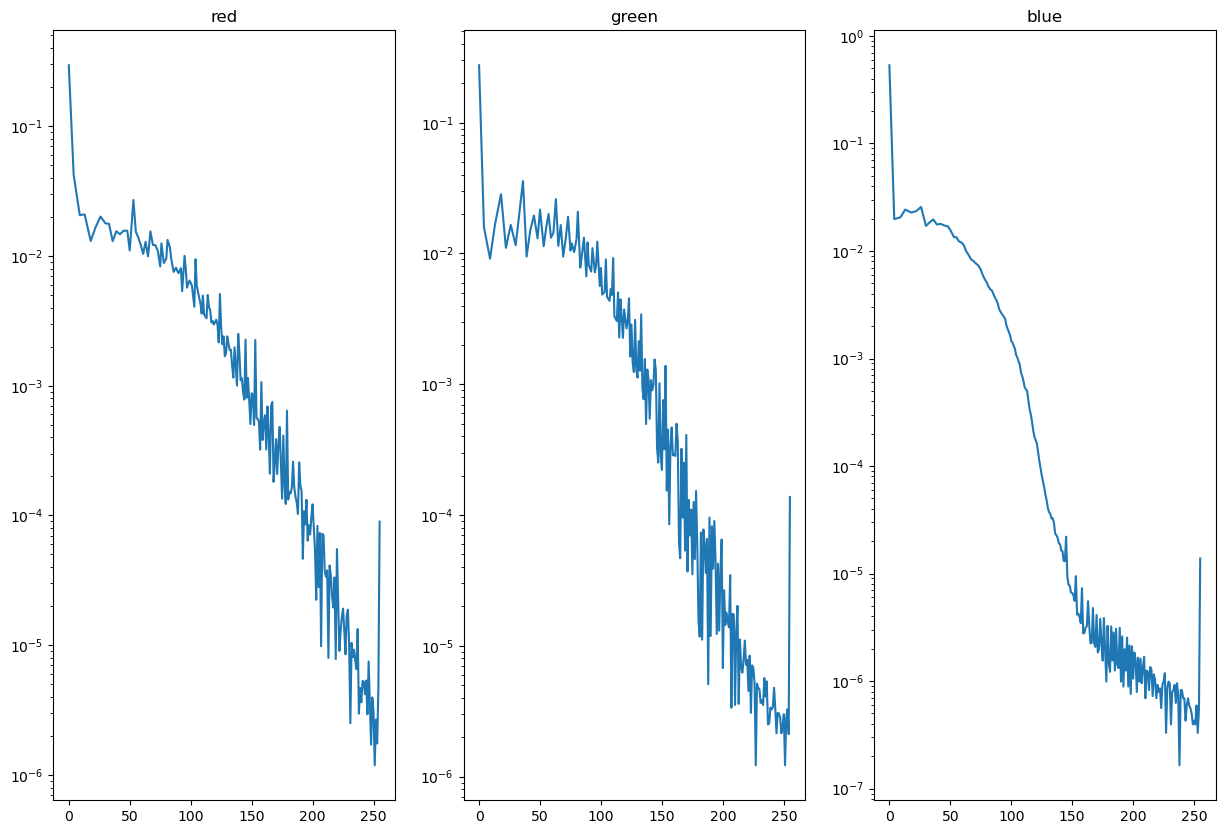

In [25]:
plt.subplots(1,3, figsize=(15,10))
plt.subplot(1,3,1)
plt.plot(vec_x_r, vec_p_r)
plt.yscale('log')
plt.title('red')
plt.subplot(1,3,2)
plt.plot(vec_x_g, vec_p_g)
plt.yscale('log')
plt.title('green')
plt.subplot(1,3,3)
plt.plot(vec_x_b, vec_p_b)
plt.yscale('log')
plt.title('blue')
plt.show()

In [30]:
sum(vec_p_r)

0.9999999999999994